In [2]:
from pymystem3 import Mystem
m = Mystem()

In [40]:
import re
import gensim
import logging
import nltk.data
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import word2vec
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
import warnings
warnings.filterwarnings('ignore')

2020-10-24 11:38:30,576 : INFO : Loading dictionaries from c:\users\dayk\appdata\local\programs\python\python38\lib\site-packages\pymorphy2_dicts_ru\data
2020-10-24 11:38:30,664 : INFO : format: 2.4, revision: 404381, updated: 2017-08-28T16:38:19.536338


In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Пункт 1
1. Преобразовать текст в формат:
* только леммы, без знаков препинания, все в нижнем регистре
* каждое предложение на отдельной строчке

In [5]:
def read_clean(file, new_file):
    with open (file, encoding = 'utf-8') as f:
        my_text = f.readlines()
    for line in my_text:
        l = m.lemmatize(line)
        words = [w.lower() for w in l if w.isalpha()]
        line = ' '.join(words)
        with open (new_file, encoding = 'utf-8', mode = 'a') as n_f:
            n_f.write(line+'\n')
t = read_clean('anna-karenina.txt', 'lemmas_anna.txt')
t

2. Обучить модель как показано в конспекте с параметрами
* размер вектора 300
* минимальное количество вхождений 5
* окно 5
* количество итераций 50
* Вопрос: сколько получилось слов в этой модели?

In [6]:
f = 'lemmas_anna.txt'
data = gensim.models.word2vec.LineSentence(f)

In [7]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [8]:
%time model = gensim.models.Word2Vec(data, size=300, window=5, min_count=5, iter = 5)

2020-10-24 11:10:43,554 : INFO : collecting all words and their counts
2020-10-24 11:10:43,577 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-24 11:10:46,157 : INFO : collected 12335 word types from a corpus of 268921 raw words and 7825 sentences
2020-10-24 11:10:46,158 : INFO : Loading a fresh vocabulary
2020-10-24 11:10:46,166 : INFO : effective_min_count=5 retains 3997 unique words (32% of original 12335, drops 8338)
2020-10-24 11:10:46,167 : INFO : effective_min_count=5 leaves 254675 word corpus (94% of original 268921, drops 14246)
2020-10-24 11:10:46,179 : INFO : deleting the raw counts dictionary of 12335 items
2020-10-24 11:10:46,180 : INFO : sample=0.001 downsamples 56 most-common words
2020-10-24 11:10:46,181 : INFO : downsampling leaves estimated 184713 word corpus (72.5% of prior 254675)
2020-10-24 11:10:46,189 : INFO : estimated required memory for 3997 words and 300 dimensions: 11591300 bytes
2020-10-24 11:10:46,190 : INFO : resetting l

Wall time: 4.41 s


In [9]:
print(len(model.wv.vocab))

3997


3. Использовать следующие функции:
найти ближайшие 5 слов для
* любого частотного слова (союза/местоимения/частицы)
* абстрактного понятия
* имени главного героя
* прилагательных "хороший" и "плохой" (или любых других антонимов) (краткий комментарий про то, встретились ли синонимы, антонимы, близкие по распределению слова)

In [11]:
model.wv.most_similar("и", topn=5)

[('тело', 0.9927268028259277),
 ('наполнять', 0.9925136566162109),
 ('радость', 0.992504358291626),
 ('враждебность', 0.9924181699752808),
 ('отравлять', 0.9923233985900879)]

In [12]:
model.wv.most_similar("мысль", topn=5)

[('душа', 0.9902912378311157),
 ('положение', 0.9856568574905396),
 ('жизнь', 0.9801018238067627),
 ('любовь', 0.9734194278717041),
 ('чувство', 0.9704731106758118)]

In [13]:
model.wv.most_similar("левин", topn=5)

[('шутливо', 0.9882187843322754),
 ('княгиня', 0.9868007898330688),
 ('воркуев', 0.9865370988845825),
 ('весловский', 0.9857174158096313),
 ('князь', 0.985055685043335)]

In [54]:
model.wv.most_similar("константин", topn=5)

[('удаваться', 0.9986545443534851),
 ('попробовать', 0.9986283779144287),
 ('шутка', 0.9986161589622498),
 ('уговаривать', 0.9985591173171997),
 ('ужин', 0.9984685182571411)]

In [14]:
model.wv.most_similar("хороший", topn=5)

[('предпринимать', 0.9957557320594788),
 ('можно', 0.9929134845733643),
 ('убежденный', 0.9925966858863831),
 ('трудиться', 0.9925309419631958),
 ('должный', 0.9917792081832886)]

In [15]:
model.wv.most_similar("плохой", topn=5)

[('напротив', 0.9994299411773682),
 ('жениться', 0.9993950128555298),
 ('оставлять', 0.9993268251419067),
 ('испортить', 0.9992455244064331),
 ('признаваться', 0.9986782073974609)]

Никаких синонимов или антонимов не встретилось.

* найти любую семантическую пропорцию (краткий комментарий, почему Вы выбрали такую пропорцию)

In [16]:
model.wv.most_similar(positive=["так", "как"], negative=["такой"], topn=1)

[('отчего', 0.9500342607498169)]

* найти лишнее в списке слов (краткий комментарий про результат)

Глагол *становиться* не относится к глаголам речи.

In [17]:
model.wv.doesnt_match('отвечать говорить спрашивать становиться понимать'.split())

'становиться'

Попробуйте сделать визуализацию с помощью PCA (один из вариантов на выбор, можно предложить свой)
* попробуйте на именах героев (4+ имен, можно брать имя и фамилию героя отдельно, это даже интересно): это отражает их отношения / их характеры?
* попробуйте на каких-то названиях предметов или животных: насколько это похоже на правду?
* попробуйте на союзах, частицах, экспрессивах, многозначных словах: насколько результат соответствует Вашим ожиданиям?

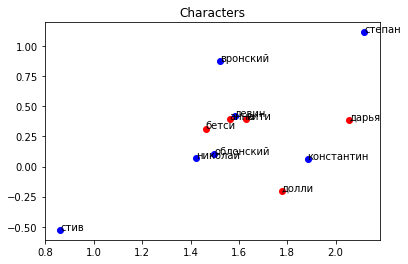

In [24]:
men = ['левин', 'константин', 'николай', 'стив', 'степан', 'облонский', 'вронский']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[men])
plt.scatter(coords[:, 0], coords[:, 1], color='blue')
for i, word in enumerate(men):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
women = ['кити', 'долли', 'дарья', 'бетси', 'анна']
coords = pca.transform(model[women])
plt.scatter(coords[:, 0], coords[:, 1], color='red')
for i, word in enumerate(women):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.title('Characters')
plt.show()

* Можно заметить, что Анна и Кити довольно близки.
* Имена, фамилии и сокращённые имена употребляются по-разному.
* Мужчины и женщины не группируются в две группы, как я ожидала.

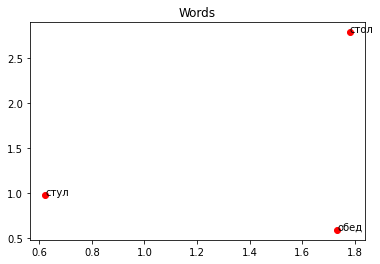

In [55]:
words = ['обед', 'стол', 'стул']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[words])
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')
for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

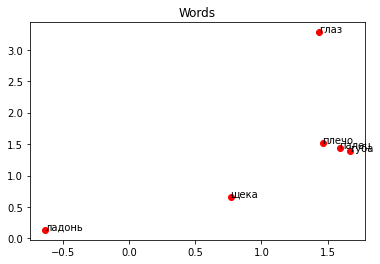

In [56]:
words = ['глаз', 'ладонь', 'губа', 'щека', 'палец', 'плечо']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[words])
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')
for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

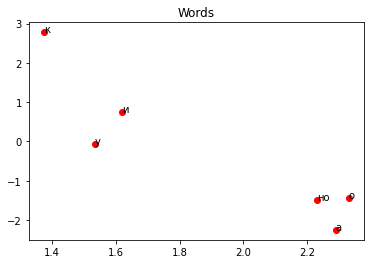

In [57]:
words = ['а', 'и', 'о', 'но', 'у', 'к']
pca = PCA(n_components=2)
pca.fit(model[list(model.wv.vocab)])
coords = pca.transform(model[words])
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')
for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

In [52]:
def pre(sent):
    pre_sent = sent.lower().split()
    pre_sent = m.lemmatize(sent)
    my_sent = [w.lower() for w in pre_sent if w.isalpha()]
    return my_sent

s = 'Уж который раз он видел его приезжавшим в Москву из деревни, где он что-то делал, но что именно, того Степан Аркадьич никогда не мог понять хорошенько, да и не интересовался'
prep = pre(s)

In [53]:
def change (my_list, my_model, stops):
    new_sent = ''
    for word in my_list:
        if word not in stops:
            common = model.wv.most_similar(word, topn = 1)
            new_sent += common[0][0]
            new_sent += ' '
    print(new_sent)
my_stops = ['а', 'и', 'не', 'но', 'к', 'в', 'из',
           'на', 'над', 'за', 'о', 'у', 'ни', 'да', 'от']
change(prep, model, my_stops)

ведь тот новый она потому она поехать деревня жалование весна она сделать не решать потому сергей ай верить понимать мочь нужно переменять 
